In [1]:
import pandas as pd
import sklearn

teams = pd.read_csv('teams.csv')

teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [2]:
# WE GET READ OF SOME OF THE COLUMNS THAT WE DEEM  NOT USEFUL.

teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [3]:

# indentify columns with data type 'object' (string)
string_columns = teams.dtypes[teams.dtypes == 'object'].index

# Check if any column contains only string values
for column in  string_columns:
    if teams[column].apply(lambda x: isinstance(x, str)).all():
        teams.drop(columns=column, inplace=True)


teams.corr()['medals']

/var/folders/xr/1_wx8_453tv6_qg5y6g5q_tm0000gn/T/ipykernel_717/1166689407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams.drop(columns=column, inplace=True)
/var/folders/xr/1_wx8_453tv6_qg5y6g5q_tm0000gn/T/ipykernel_717/1166689407.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams.drop(columns=column, inplace=True)


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


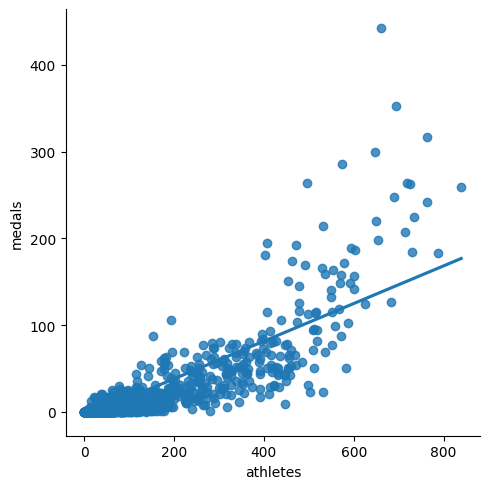

In [4]:
import seaborn as sns

sns.lmplot(x='athletes', y='medals',   data=teams, fit_reg=True, ci=None)

In [14]:
# find missing row values
teams[teams.isnull().any(axis=1)]

,year,athletes,age,prev_medals,medals


In [15]:
# Remove the missing rows from the dataframe
teams = teams.dropna()
teams

,year,athletes,age,prev_medals,medals
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


In [7]:
train_set = teams[teams['year'] < 2012].copy()  # This is training set for the model
test_set = teams[teams['year'] >= 2012].copy()  # This is the testing set for the model
#train_set.shape
#test_set.shape

In [8]:
# WE NOW DO THE ACTUAL TRAINING AND TESTING USING LINEAR REGRESSION.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
predictors = ['athletes', 'prev_medals']
target = 'medals'

reg.fit(train_set[predictors],  train_set['medals'])
predictions = reg.predict(test_set[predictors])
test_set['predictions'] = predictions

test_set.loc[test_set['predictions'] < 0, 'predictions'] = 0
test_set['predictions'] = test_set['predictions'].round()

test_set

,year,athletes,age,prev_medals,medals,predictions
6,2012,6,24.8,1.0,1,0.0
7,2016,3,24.7,1.0,0,0.0
24,2012,10,25.7,0.0,0,0.0
25,2016,6,23.7,0.0,0,0.0
37,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...
2111,2016,3,19.3,0.0,0,0.0
2131,2012,7,22.6,0.0,0,0.0
2132,2016,7,24.1,0.0,0,0.0
2142,2012,9,27.3,4.0,0,2.0


In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

error = mean_absolute_error(test_set['medals'], test_set['predictions'])
sq_error = mean_squared_error(test_set['medals'], test_set['predictions'])
root_sq_error = np.sqrt(sq_error)
print('The mean absolute error is:',error)
print('Ther mean squared errors is:', sq_error)
print('the Root mean squared error is:', root_sq_error)
teams.describe()['medals']

The mean absolute error is: 3.2987654320987656
Ther mean squared errors is: 65.42222222222222
the Root mean squared error is: 8.088400473654987


count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [10]:
# We check how the predicted model fairs with our actual data.

test_set[test_set['year'] == 2016]

,year,athletes,age,prev_medals,medals,predictions
7,2016,3,24.7,1.0,0,0.0
25,2016,6,23.7,0.0,0,0.0
38,2016,74,24.0,1.0,2,4.0
49,2016,4,26.0,0.0,0,0.0
58,2016,26,27.5,0.0,0,0.0
...,...,...,...,...,...,...
2091,2016,28,26.9,0.0,2,0.0
2099,2016,4,20.8,0.0,0,0.0
2111,2016,3,19.3,0.0,0,0.0
2132,2016,7,24.1,0.0,0,0.0


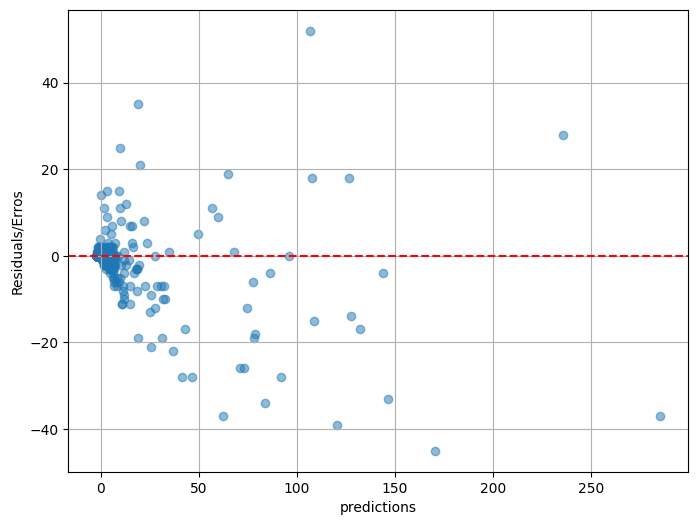

In [11]:
errors = (test_set['medals'] - test_set['predictions'])

test_set['errors'] = errors
test_set

plt.figure(figsize=(8, 6))
plt.scatter(predictions, errors, alpha=0.5)
plt.xlabel('predictions')
plt.ylabel('Residuals/Erros')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

From the above predictive model, we have managed to successfully predict the number of olympic medals that a particular country will win at an upcoming olympics event. To make these predictions we made us of the number of medals in the previous olympics along with the number of athletes that each country had in those respective olympics events. The mean absolute error for our model predictions is 3.299, which is far less than our standard deviation of 33.628. The mean squared error is 65.422 with a root mean squared error of 8.088. These three metrics suggest that the model is a reasonable predictor. We go a step further and display the residuals (erros) as a function of the predictions, to for any obvious patterns/trends. 

From the figure generated in the previous cell, we see that the residual points are all scattered around the red line, with the majority having differences that are less than 10. We quickly see that for countries that usually win less medals (< 30), the model is more accurage at making predictions. But for countries that win many medals (> 100) we see that the model does not do that great in making it's predictions, but still it is a reasonable model. 
